# Stock Price Prediction Model - "Machine Learning" /                                "Artificial Intelligence"
## Price Prediction \\ AI/  Machine learning

**Data Handeling \ wrangling \ Manuplating** 

- By: **Ertiza Abbas**                             \\   April 20th - 2022
- Location : $Singapore$

-  Related libraries

In [219]:
import math
import pandas as pd 
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import scipy as sc 
import numpy as np
import datetime as dt
import mplfinance as mpf
plt.style.use('fivethirtyeight')
import tensorflow as tf

### * Loading Data from Yahoo finance 

In [220]:
# company =  'NQ=F'    # NASDAQ Futures
# company =  'FB'      # Facebook
company =  '^DJI'    # Dow Jones   
# company = 'GC=F'     # Gold/USD

start = dt.datetime(2015,1,1)
end = dt.datetime.now()

data = web.DataReader(company, 'yahoo', start, end)

In [221]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,18043.220703,17820.880859,17987.660156,17823.070312,82840000,17823.070312
2015-01-02,17951.779297,17731.300781,17823.070312,17832.990234,76270000,17832.990234
2015-01-05,17821.300781,17475.929688,17821.300781,17501.650391,116160000,17501.650391
2015-01-06,17581.050781,17262.369141,17504.179688,17371.640625,101870000,17371.640625
2015-01-07,17597.080078,17374.779297,17374.779297,17584.519531,91030000,17584.519531
...,...,...,...,...,...,...
2022-04-13,34598.359375,34140.640625,34166.640625,34564.589844,313630000,34564.589844
2022-04-14,34889.171875,34437.500000,34628.460938,34451.230469,353680000,34451.230469
2022-04-18,34618.289062,34279.078125,34411.488281,34411.691406,264110000,34411.691406


In [222]:
data.describe

<bound method NDFrame.describe of                     High           Low          Open         Close     Volume  \
Date                                                                            
2014-12-31  18043.220703  17820.880859  17987.660156  17823.070312   82840000   
2015-01-02  17951.779297  17731.300781  17823.070312  17832.990234   76270000   
2015-01-05  17821.300781  17475.929688  17821.300781  17501.650391  116160000   
2015-01-06  17581.050781  17262.369141  17504.179688  17371.640625  101870000   
2015-01-07  17597.080078  17374.779297  17374.779297  17584.519531   91030000   
...                  ...           ...           ...           ...        ...   
2022-04-13  34598.359375  34140.640625  34166.640625  34564.589844  313630000   
2022-04-14  34889.171875  34437.500000  34628.460938  34451.230469  353680000   
2022-04-18  34618.289062  34279.078125  34411.488281  34411.691406  264110000   
2022-04-19  34983.109375  34394.621094  34394.621094  34911.199219  2963500

In [223]:
data.shape
print('Data appeared as it is as appeared in above table data frame, via yahoo finance pd data readre')

Data appeared as it is as appeared in above table data frame, via yahoo finance pd data readre


### Plotting / visualizing closing price and open price


<function matplotlib.pyplot.show(close=None, block=None)>

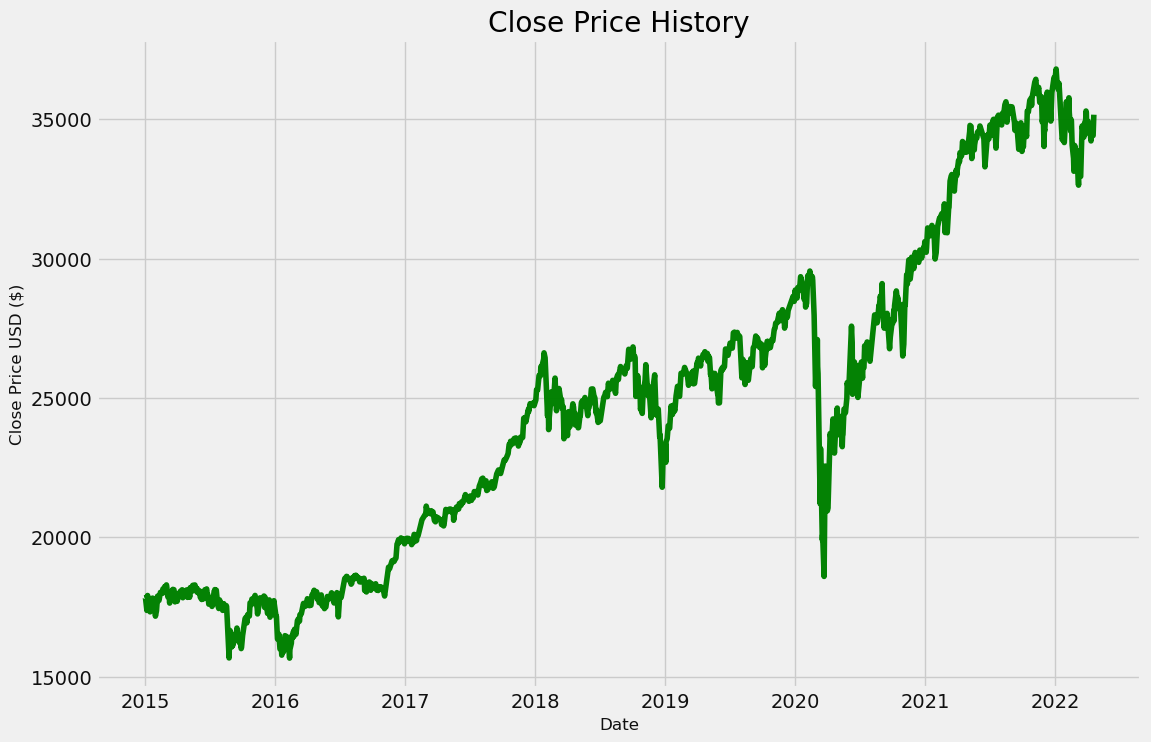

In [224]:
plt.figure(figsize=(12,8))
plt.title('Close Price History')
# plt.plot(data['Open'], color= 'red', alpha=2)
plt.plot(data['Close'], color= 'green', alpha=5)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Close Price USD ($)', fontsize= 12)
plt.show

<Figure size 2400x1100 with 0 Axes>

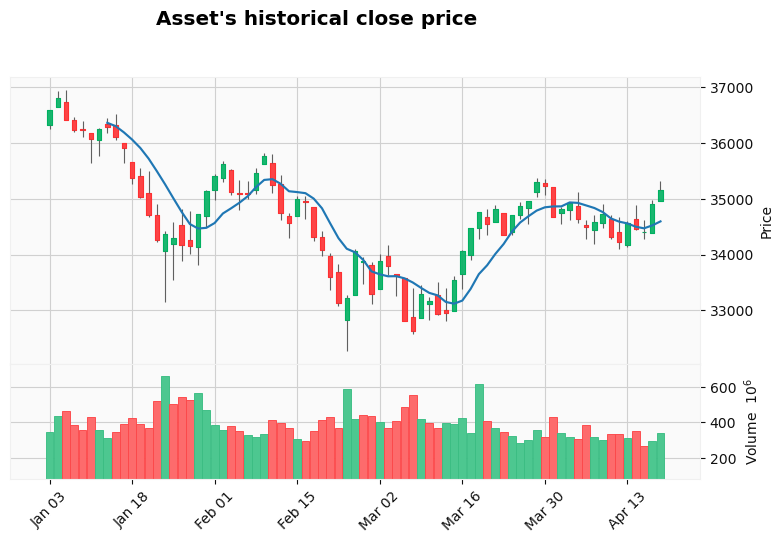

In [225]:
plt.figure(figsize= (24,11))
mpf.plot(data['2022-01-01':], figratio = (20,12), type = 'candle',
         title = "Asset's historical close price",
         mav =(8), volume= True,
                style = 'yahoo')

### Creating new data frame with only 'Close' column

In [226]:
asset = data.filter(['Close'])

### convert the DataFrame to a numpy array

In [227]:
dataset = asset.values

In [228]:
# fb
# asset

### Getting the number of rows to train the model- Stock / Indicies / crypto / fx_pairs

#### Prepare Data 

In [229]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

# Now let's defined how many days need to look back to predict the future price 

prediction_days = 60

# creating two empty lists for data training purpose 

x_train=[]
y_train=[]

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


### Building the Model

In [230]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) #prediction of the next closing value

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 61, batch_size = 2)

'''Test the model accuracy on existing data'''

Epoch 1/61
890/890 [==============================] - 26s 26ms/step - loss: 0.0078
Epoch 2/61
890/890 [==============================] - 23s 26ms/step - loss: 0.0032
Epoch 3/61
890/890 [==============================] - 23s 26ms/step - loss: 0.0033
Epoch 4/61
890/890 [==============================] - 23s 26ms/step - loss: 0.0024
Epoch 5/61
890/890 [==============================] - 23s 26ms/step - loss: 0.0021
Epoch 6/61
890/890 [==============================] - 23s 26ms/step - loss: 0.0020
Epoch 7/61
890/890 [==============================] - 24s 27ms/step - loss: 0.0017
Epoch 8/61
890/890 [==============================] - 24s 27ms/step - loss: 0.0018
Epoch 9/61
890/890 [==============================] - 23s 26ms/step - loss: 0.0018
Epoch 10/61
890/890 [==============================] - 23s 26ms/step - loss: 0.0015
Epoch 11/61
890/890 [==============================] - 23s 26ms/step - loss: 0.0016
Epoch 12/61
890/890 [==============================] - 23s 26ms/step - loss: 0.0016
E

'Test the model accuracy on existing data'

In [208]:
## Loading Data for testing

test_start=dt.datetime(2022, 1
                       , 1)
test_end=dt.datetime.now()

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices=test_data['Close'].values

total_dataset=pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

### Make Predictions on Test Data

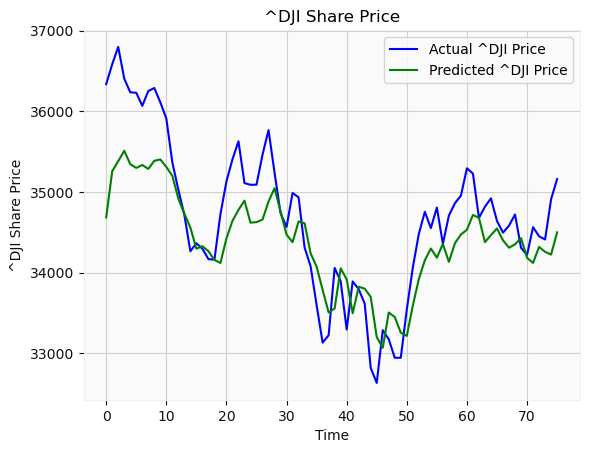

In [209]:
x_test=[]

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices=model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)

# Plot the test predictions
plt.plot(actual_prices, color = "blue", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()

# <**Predict Next Day**>

In [210]:
real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data=np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

prediction=model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

Prediction: [[34639.1]]


In [211]:
print("This is the predicting price of stock:  ")
print(prediction)
print(company)

This is the predicting price of stock:  
[[34639.1]]
^DJI


In [218]:
dji_closing_price = web.DataReader('^DJI', data_source= 'yahoo', start:'2015-01-01')

print(dji_quote2['Close'])

SyntaxError: invalid syntax (<ipython-input-218-56ad9ba60866>, line 1)